In [4]:
import pandas as pd

loan = pd.read_csv("loan_data.csv")

In [6]:
loan.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
# Check the number of rows and columns
print(loan.shape)

# Display general information about the dataset
print(loan.info())

# Display the first 5 rows
print(loan.head())

# Display column names
print(loan.columns)

# Summary statistics for numeric columns
print(loan.describe())

# Summary statistics for all columns (including non-numeric)
print(loan.describe(include='all'))

(45000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaul

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_f

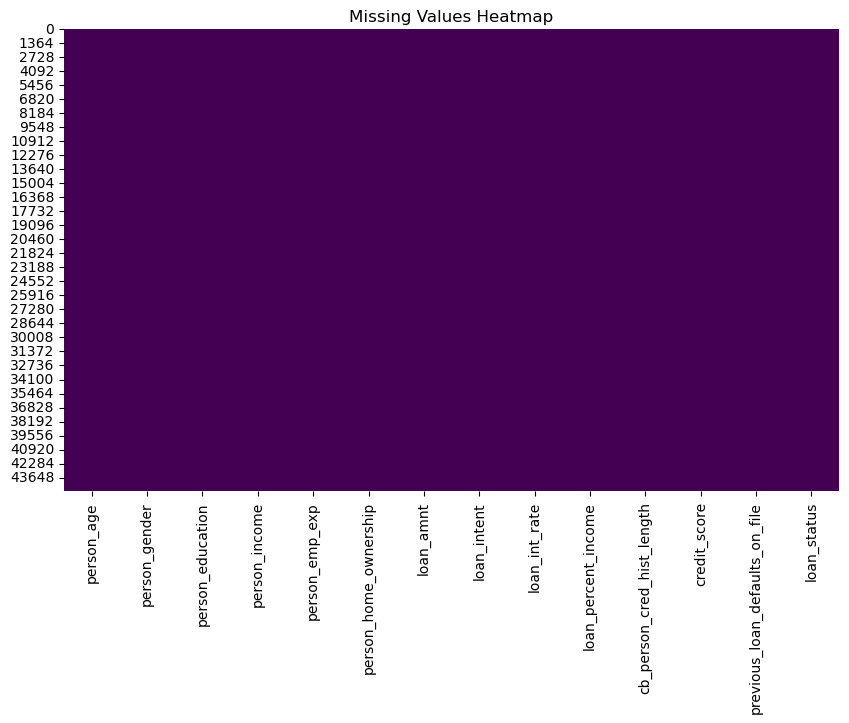

In [8]:
# Check for missing values
print(loan.isnull().sum())

# Percentage of missing values
print(loan.isnull().mean() * 100)

# Visualize missing values (requires matplotlib or seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(loan.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

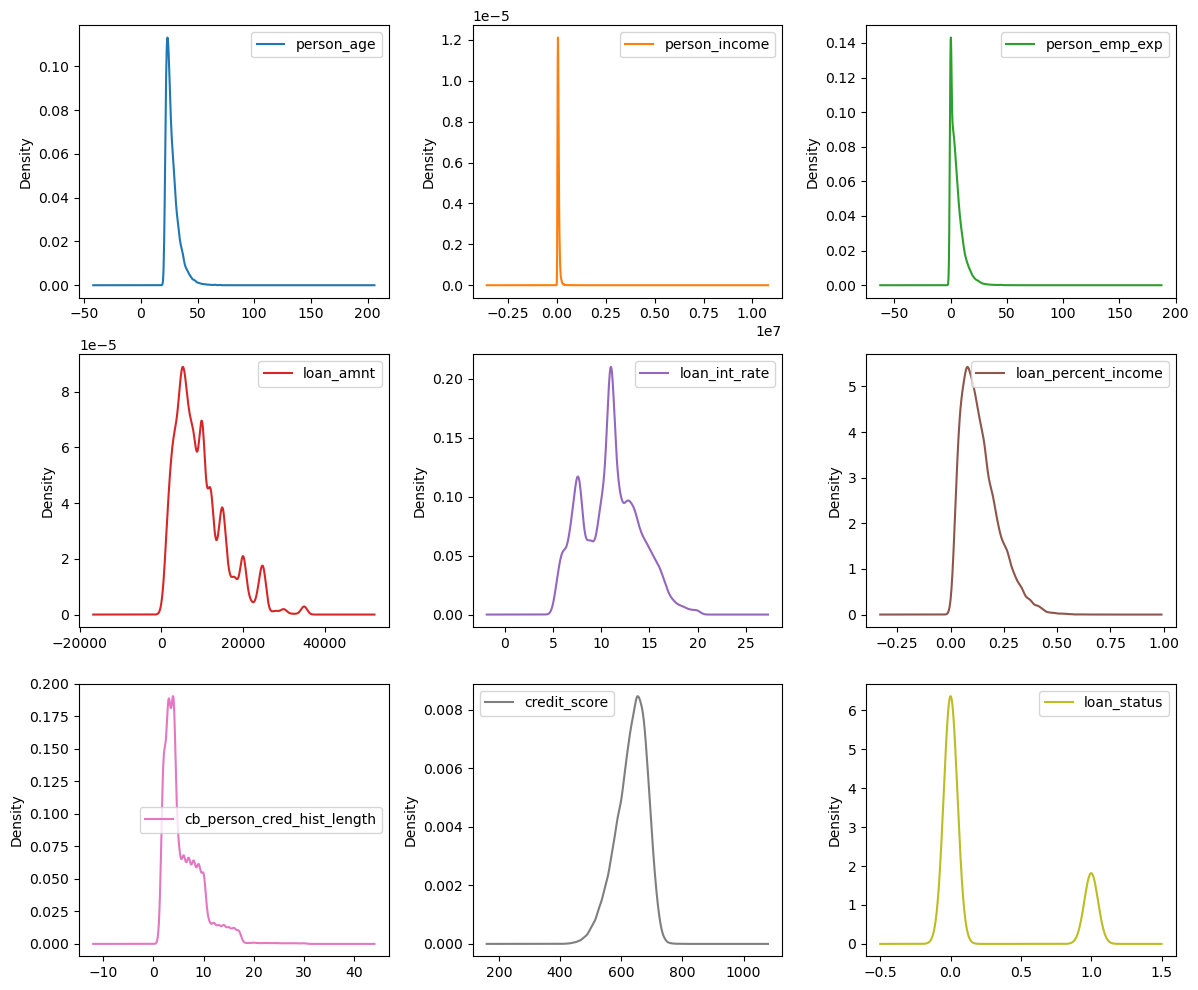

In [9]:
# Kernel Density Estimate (KDE) for numeric columns
loan.plot(kind='kde', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False)
plt.tight_layout()
plt.show()

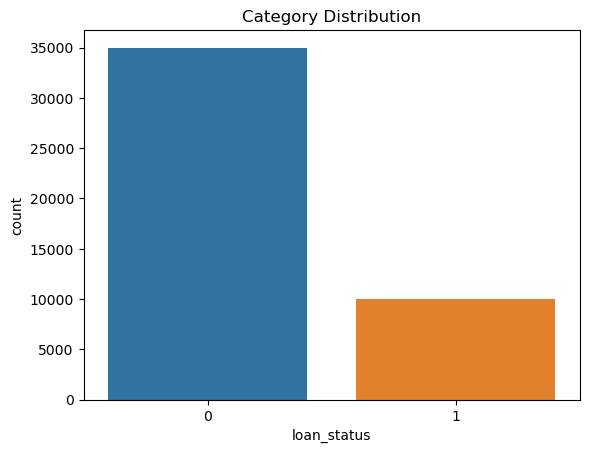

In [11]:
# Bar plot for a specific categorical column
sns.countplot(x='loan_status', data=loan)
plt.title("Category Distribution")
plt.show()

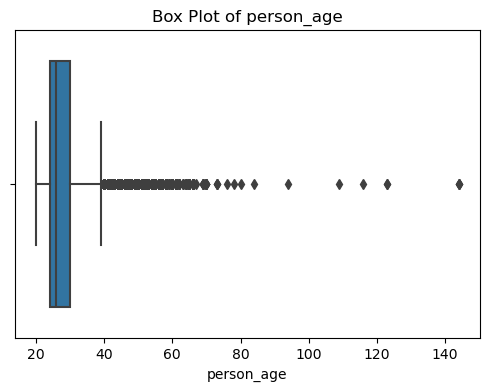

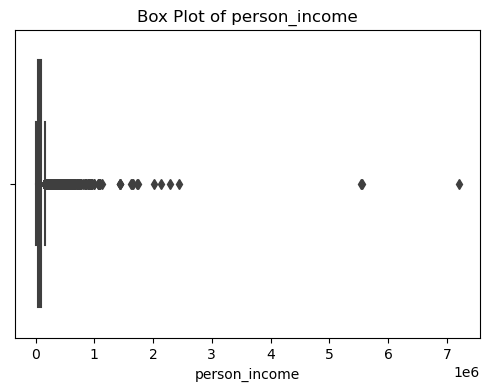

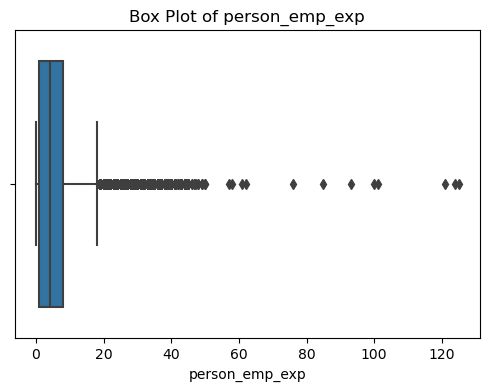

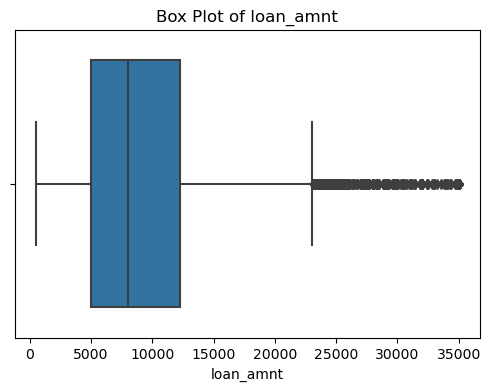

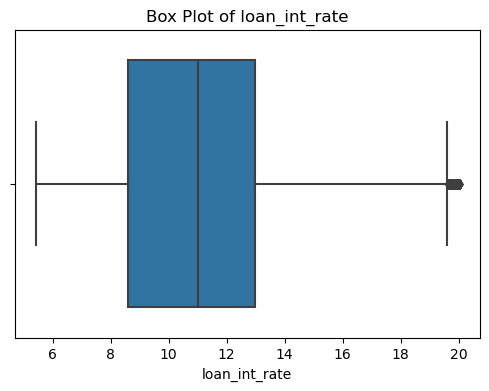

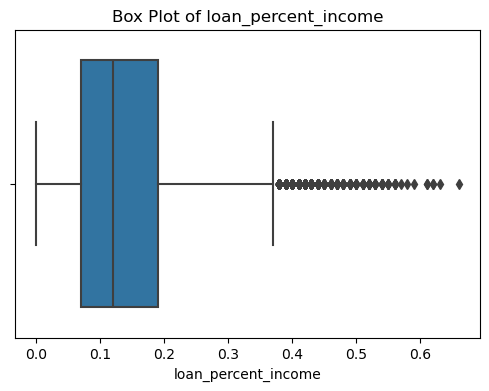

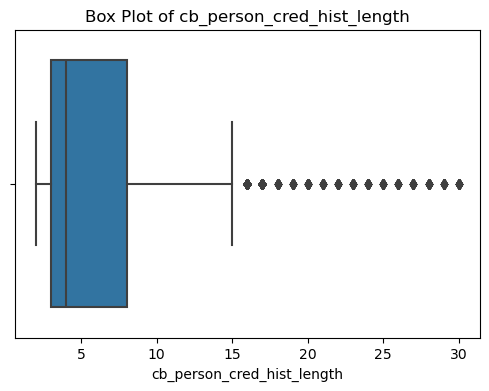

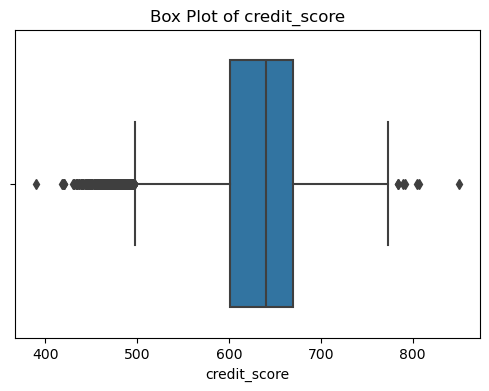

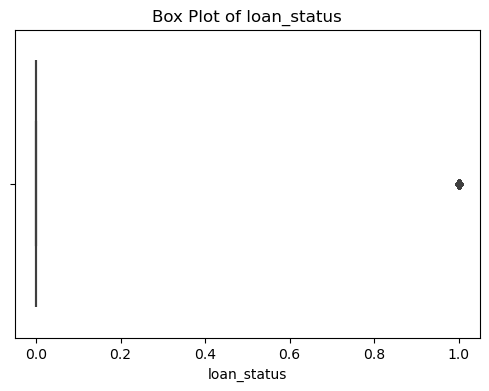

In [13]:
# Box plot to identify outliers in all numerical features
numeric_columns = loan.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=loan[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [16]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
loan = pd.read_csv("loan_data.csv")

In [22]:
missing_percentage = loan.isna().sum() 
print(missing_percentage)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [23]:
# Encode categorical columns
for col in loan.select_dtypes('object').columns:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col])

In [29]:
X = loan.drop(columns=['loan_status'])
y = loan['loan_status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [30]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# Train XGBoost model
xgb_model = xgb.train(
    {
        'max_depth': 5,
        'eta': 0.2,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'hist',
    },
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=500
)

[0]	train-auc:0.95270	val-auc:0.95435
[1]	train-auc:0.96049	val-auc:0.96108
[2]	train-auc:0.96192	val-auc:0.96183
[3]	train-auc:0.96309	val-auc:0.96304
[4]	train-auc:0.96404	val-auc:0.96357
[5]	train-auc:0.96513	val-auc:0.96520
[6]	train-auc:0.96584	val-auc:0.96539
[7]	train-auc:0.96654	val-auc:0.96600
[8]	train-auc:0.96687	val-auc:0.96639
[9]	train-auc:0.96713	val-auc:0.96701
[10]	train-auc:0.96826	val-auc:0.96789
[11]	train-auc:0.96878	val-auc:0.96811
[12]	train-auc:0.96906	val-auc:0.96839
[13]	train-auc:0.96964	val-auc:0.96893
[14]	train-auc:0.96989	val-auc:0.96937
[15]	train-auc:0.97008	val-auc:0.96939
[16]	train-auc:0.97050	val-auc:0.96976
[17]	train-auc:0.97065	val-auc:0.96996
[18]	train-auc:0.97089	val-auc:0.97015
[19]	train-auc:0.97146	val-auc:0.97045
[20]	train-auc:0.97188	val-auc:0.97083
[21]	train-auc:0.97196	val-auc:0.97085
[22]	train-auc:0.97234	val-auc:0.97118
[23]	train-auc:0.97248	val-auc:0.97126
[24]	train-auc:0.97301	val-auc:0.97163
[25]	train-auc:0.97312	val-auc:0.97

In [31]:
# Predict probabilities on the test set
y_pred_prob_xgb = xgb_model.predict(dtest)

# Convert probabilities to binary predictions (threshold = 0.2)
y_pred_xgb = (y_pred_prob_xgb >= 0.25).astype(int)

In [32]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print(f"Balanced Accuracy (Sklearn): {balanced_accuracy_xgb:.4f}")

Balanced Accuracy (Sklearn): 0.9108


In [33]:
# Extract feature importance metrics
importance_gain = xgb_model.get_score(importance_type='gain')
importance_cover = xgb_model.get_score(importance_type='cover')
importance_weight = xgb_model.get_score(importance_type='weight')

# Combine into a DataFrame
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': list(importance_gain.keys()),  # Feature names
    'Gain': list(importance_gain.values()),   # Gain values
    'Cover': [importance_cover.get(k, 0) for k in importance_gain.keys()],  # Cover values
    'Frequency': [importance_weight.get(k, 0) for k in importance_gain.keys()]  # Frequency (weight)
}).sort_values(by='Gain', ascending=False)  # Sort by Gain

print(feature_importance_df)

                           Feature        Gain        Cover  Frequency
12  previous_loan_defaults_on_file  657.387695  2431.682129       51.0
9              loan_percent_income    8.964542   286.429810     1275.0
5            person_home_ownership    8.897355   197.128464      433.0
8                    loan_int_rate    4.332121   297.781586     2823.0
7                      loan_intent    3.576710   198.796204     1036.0
3                    person_income    3.282393   372.435944     3384.0
11                    credit_score    1.519921   207.807373     2438.0
0                       person_age    1.413461   191.932785     1091.0
6                        loan_amnt    1.359897   290.588531     1871.0
10      cb_person_cred_hist_length    1.238724   174.584946      903.0
4                   person_emp_exp    1.175602   182.262909      976.0
1                    person_gender    1.086082    57.885971      258.0
2                 person_education    1.052164    87.617661      539.0
